##Link data



### 1. Exploratory variables
- Population: https://worldpopulationreview.com/world-cities
- Population density
- GDP: https://en.wikipedia.org/wiki/List_of_cities_by_GDP
- Average temperature: https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature#cite_note-1
- Altitude:https://en.wikipedia.org/wiki/List_of_capital_cities_by_elevation
- Humidity: https://en.climate-data.org/
- Area:https://en.wikipedia.org/wiki/List_of_national_capitals_by_area
- Congestion level: https://www.tomtom.com/en_gb/traffic-index/ranking/
- Number of high building: https://www.skyscrapercenter.com/cities?list=buildings-150
- Internation visitor: https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors
- sunshine time : https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration

### 2. Response variable
- Air quality: https://www.iqair.com/world-air-quality-ranking

##Data crawling

###1. Population: https://worldpopulationreview.com/world-cities

In [ ]:
import pandas as pd
import requests

url = "https://worldpopulationreview.com/world-cities"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df1 = df_list[0]
# print(df1.shape)
#df1.head()

In [ ]:
columns = list(df1.columns)
features = columns[1:len(columns)-2]
df1 = df1[features]
df1 = df1.drop(df1.columns[[1]], axis=1)
df1.rename(columns={'Name':'City',"2021 Population":"Population"}, inplace=True)
df1

,City,Population
0,Tokyo,37339804
1,Delhi,31181376
2,Shanghai,27795702
3,Sao Paulo,22237472
4,Mexico City,21918936
...,...,...
1165,Kolwezi,501375
1166,Kabinda,501054
1167,Jianyang,500925
1168,Douai Lens,500921


###2. GDP: https://en.wikipedia.org/wiki/List_of_cities_by_GDP

In [ ]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_cities_by_GDP"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df2 = df_list[0]
# print(df2.shape)
# df2.head()

In [ ]:
features = ['City proper / Metropolitan area', 'Country/Region',
       'Official est.GDP up to date (billion US$)',
       'Brookings[5]2014 est. PPP-adjusted GDP (billion US$)',
       'Visual Capitalist[6] 2021 est. (billion US$)',
       'Visual Capitalist[7] 2021 est. GDP PPP-adjusted GDP (billion US$)']
df2 = df2[features]
df2 = df2.drop(df2.columns[[1,3,4,5]], axis=1)
df2.rename(columns={'City proper / Metropolitan area':'City',"Official est.GDP up to date (billion US$)":"GDP (billion US$)"}, inplace=True)
print(list(df2.columns[[1]]))

['GDP (billion US$)']


In [ ]:
import pandas as pd
import requests

url = "http://www.citymayors.com/statistics/richest-cities-2020.html"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df21 = df_list[2]
df21= df21.drop(df21.columns[[0,2,4]], axis=1)
df21 = df21.set_axis(['City','GDP (billion US$)'], axis=1, inplace=False)
df21=df21.drop(index=0)

In [ ]:
df2= pd.concat([df2,df21])
df2=df2.drop_duplicates(subset='City', keep='last')
df2

,City,GDP (billion US$)
0,Aachen-Liège-Maastricht,NaN
1,"Abbotsford, British Columbia",5.313 (2016)[8]
2,Aberdeen,16.986 (2013)[9]
4,Abu Dhabi,119[11]
5,Adelaide,64.461 (2018–19)[12]
...,...,...
147,Addis Ababa,18
148,Kano,14
149,Dar es Salaam,13
150,Krakow,13


###3. Average temperature: https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature#cite_note-1

In [ ]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature#cite_note-1"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
print(len(df_list))
df3 = pd.concat(df_list)
df3 = df3.drop(df3.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,15]], axis=1)
df3.rename(columns={"City":"City","Year":"Temperature(C)"}, inplace=True)
print(df3.shape)
df3

6
(455, 2)


,City,Temperature(C)
0,Algiers,17.4(63.3)
1,Tamanrasset,21.7(71.1)
2,Reggane,28.3(82.9)
3,Luanda,25.8(78.4)
4,Cotonou,27.2(81.0)
...,...,...
51,Lima,19.2(66.6)
52,Piura,24.5(76.1)
53,Paramaribo,26.8(80.2)
54,Montevideo,16.7(62.1)


In [ ]:
# df3.sort_values(by=['Country'])

###4. Altitude:https://en.wikipedia.org/wiki/List_of_capital_cities_by_elevation

In [ ]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_capital_cities_by_elevation"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
print(len(df_list))
df4 = pd.concat(df_list)
df4 = df4.drop(df4.columns[[0,3,4,5]], axis=1)
df4.rename(columns={"Capital":"City"}, inplace=True)
print(df4.shape)
df4

2
(227, 2)


,City,Elevation (m)
0,La Paz,3640
1,Quito,2850
2,Bogotá,2625
3,Addis Ababa,2355
4,Thimphu,2334
...,...,...
27,Basse-Terre,NaN
28,Willemstad,NaN
29,Marigot,NaN
30,Kralendijk,NaN


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
elevation=[]
city=[]
url = "https://www.kudacity.com/cset/by_elevation"
r = requests.get(url).text
soup=BeautifulSoup(r,'lxml')
list_data=soup.find_all('div',class_='desktop_three_columns')
for data in list_data:
  find_li= data.find_all('li')
  for texts in find_li:
    elevation.append(texts.text.split('m')[0][1:])
    lcity=texts.find_all('a')
    city.append(lcity[0].text)
df41 = pd.DataFrame(list(zip(city, elevation)),
               columns =['City', 'Elevation (m)'])
df41

,City,Elevation (m)
0,Dubai,-2
1,Arkhangelsk,1
2,Miami,1
3,Osaka,1
4,New Orleans,2
...,...,...
191,Cuenca,"2,546"
192,Bogota,"2,605"
193,Sucre,"2,806"
194,Quito,"2,815"


In [ ]:
df4= pd.concat([df4,df41])
df4=df4.drop_duplicates(subset='City', keep='last')
df4

,City,Elevation (m)
2,Bogotá,2625
3,Addis Ababa,2355
4,Thimphu,2334
5,Asmara,2325
6,Sanaʽa,2250
...,...,...
191,Cuenca,"2,546"
192,Bogota,"2,605"
193,Sucre,"2,806"
194,Quito,"2,815"


###6. Area: https://en.wikipedia.org/wiki/List_of_national_capitals_by_area

In [ ]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_national_capitals_by_area"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df6 = df_list[1]
df6 = df6.drop(df6.columns[[0,1,4,5,6]], axis=1)
df6 = df6.set_axis(['City','Area (km2)' ], axis=1, inplace=False)
print(df6.shape)
df6.head()

(253, 2)


,City,Area (km2)
0,Ankara,24521
1,Khartoum,22142
2,Dar es Salaam (de facto and jurisdictional cap...,10989
3,Naypyidaw[2],7054
4,Brasília,5802


###7. Congestion level: https://www.tomtom.com/en_gb/traffic-index/ranking/

In [ ]:
import pandas as pd
import requests

url = "https://www.tomtom.com/en_gb/traffic-index/ranking/"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df7 = df_list[0]
# print(df7.shape)
df7.head()

,Rank by filter,World Rank,City,Days with low traffic,Congestion month by month,Congestion Level 2020,Change from 2019,Unnamed: 7
0,1,NaN,Moscow region (oblast)Russia,66 days,NaN,54%,5%p8% less traffic than in 2019,NaN
1,2,NaN,MumbaiIndia,133 days,NaN,53%,12%p18% less traffic than in 2019,NaN
2,3,NaN,BogotaColombia,116 days,NaN,53%,15%p22% less traffic than in 2019,NaN
3,4,NaN,ManilaPhilippines,128 days,NaN,53%,18%p25% less traffic than in 2019,NaN
4,5,NaN,IstanbulTurkey,80 days,NaN,51%,4%p7% less traffic than in 2019,NaN


In [ ]:
txt = 'MumbaiIndia'
txt.split()

['MumbaiIndia']

In [ ]:
features = ['City', 'Days with low traffic',
       'Congestion month by month', 'Congestion Level 2020',
       'Change from 2019']
df7 = df7[features]
df7 = df7.drop(df7.columns[[1,2,4]], axis=1)
df7.rename(columns={"City":"City","Congestion Level 2020":"Congestion Level (%)"}, inplace=True)
for i in range(0, df7.shape[0]):
  res = list(filter(lambda c: c.isupper(),str(df7['City'][i])))
  if len(res)>=5:
    df7['City'][i]=str(df7['City'][i]).split(res[-3])[0]
  elif len(res)==4:
    df7['City'][i]=str(df7['City'][i]).split(res[-2])[0]
  else:
    df7['City'][i]=str(df7['City'][i]).split(res[-1])[0]
df7

,City,Congestion Level (%)
0,Moscow region (oblast),54%
1,Mumbai,53%
2,Bogota,53%
3,Manila,53%
4,Istanbul,51%
...,...,...
411,Little Rock,8%
412,Winston-Salem,8%
413,Cadiz,8%
414,AkronU,8%


In [ ]:
'''import pandas as pd
import requests

url = "https://ceoworld.biz/2020/01/30/these-are-the-most-traffic-congested-cities-in-the-world-2020/?fbclid=IwAR0Ou7sCVFSRocA6zMUNCKYWaCLBC9asUW5JccG4-D7j5fBfbl7mF6f-t80"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df71 = df_list[0]
df71= df71.drop(df71.columns[[0,2]], axis=1)
df71 = df71.set_axis(['City','Congestion Level (%)'], axis=1, inplace=False)
df71'''

'import pandas as pd\nimport requests\n\nurl = "https://ceoworld.biz/2020/01/30/these-are-the-most-traffic-congested-cities-in-the-world-2020/?fbclid=IwAR0Ou7sCVFSRocA6zMUNCKYWaCLBC9asUW5JccG4-D7j5fBfbl7mF6f-t80"\n\nr = requests.get(url)\ndf_list = pd.read_html(r.text) # this parses all the tables in webpages to a list\ndf71 = df_list[0]\ndf71= df71.drop(df71.columns[[0,2]], axis=1)\ndf71 = df71.set_axis([\'City\',\'Congestion Level (%)\'], axis=1, inplace=False)\ndf71'

In [ ]:
'''
df7= pd.concat([df7,df71])
df7=df7.drop_duplicates(subset='City', keep='first')
df7'''

"\ndf7= pd.concat([df7,df71])\ndf7=df7.drop_duplicates(subset='City', keep='first')\ndf7"

###8. Number of high building: https://www.skyscrapercenter.com/cities?list=buildings-150

In [ ]:
!pip install requests_html

     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 138 kB 45.9 MB/s 
     |████████████████████████████████| 103 kB 27.6 MB/s 
     |████████████████████████████████| 127 kB 23.8 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=2059ad1a33cbbc91e28d06b04a642b3ec07a6a70375c0847e87f631d3431325c
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=db3ddf94965cb7fa72357d233141fad2b4053bbd786f64cd068698fd397c0cc4
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not

In [ ]:
from requests_html import HTMLSession
import nest_asyncio

nest_asyncio.apply()

s = HTMLSession()
url="https://www.skyscrapercenter.com/cities?list=buildings-150"
r = s.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df8 = df_list[0]
df8 = df8.drop(df8.columns[[0,2,3,4,5,7,8]], axis=1)
df8 = df8.set_axis(['City','150m+ Building' ], axis=1, inplace=False)
print(df8.shape)
df8.head()

(200, 2)


,City,150m+ Building
0,Hong Kong,517
1,Shenzhen,341
2,New York City,298
3,Dubai,237
4,Shanghai,180


In [ ]:
import pandas as pd
import requests

url = "https://ceoworld.biz/2020/05/16/revealed-cities-with-the-largest-number-of-skyscrapers-in-2020/"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df81 = df_list[0]
df81= df81.drop(df81.columns[[0,2]], axis=1)
df81 = df81.set_axis(['City','150m+ Building'], axis=1, inplace=False)
df81

,City,150m+ Building
0,Hong Kong,1.453
1,New York City,822.000
2,Shenzhen,570.000
3,Tokyo,560.000
4,Singapore,507.000
...,...,...
95,Nanchang,39.000
96,Frankfurt am Main,36.000
97,Caracas,36.000
98,Suwon,35.000


In [ ]:
df8= pd.concat([df8,df81])
df8=df8.drop_duplicates(subset='City', keep='first')
df8

,City,150m+ Building
0,Hong Kong,517.0
1,Shenzhen,341.0
2,New York City,298.0
3,Dubai,237.0
4,Shanghai,180.0
...,...,...
75,Taguig,55.0
83,Recife,49.0
86,Gold Coast City,48.0
94,Cixi,41.0


###9. Internation visitor: https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors

In [ ]:
'''from google.colab import files
uploaded = files.upload()'''

'from google.colab import files\nuploaded = files.upload()'

In [ ]:
'''import io
import pandas as pd
df91 = pd.read_csv(io.BytesIO(uploaded['arrive.csv']))
df91['Arrivals']=df91['Arrivals'].multiply(1000)
df91'''

"import io\nimport pandas as pd\ndf91 = pd.read_csv(io.BytesIO(uploaded['arrive.csv']))\ndf91['Arrivals']=df91['Arrivals'].multiply(1000)\ndf91"

In [ ]:
'''import pandas as pd
import requests

url = "https://airmundo.com/en/blog/most-visited-cities-in-europe/"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df91 = df_list[0]'''

'import pandas as pd\nimport requests\n\nurl = "https://airmundo.com/en/blog/most-visited-cities-in-europe/"\n\nr = requests.get(url)\ndf_list = pd.read_html(r.text) # this parses all the tables in webpages to a list\ndf91 = df_list[0]'

In [ ]:
'''df91 = df91.set_axis(['stt', 'City', '2019', 'Arrivals', 'Closest airports'], axis=1, inplace=False)
df91=df91.drop(index=0)
df91['Arrivals'] = df91['Arrivals'].str.replace('%', '')
df91['Arrivals'] = df91['Arrivals'].str.replace('+', '')
df91['Arrivals'] = df91['Arrivals'].str.replace(',', '.')
df91['2019']=pd.to_numeric(df91['2019'])
df91['Arrivals']=pd.to_numeric(df91['Arrivals'])
df91['Arrivals']=df91['Arrivals']*df91['2019']/100
df91 = df91.drop(df91.columns[[0,2,4]], axis=1)
df91 = df91.reset_index(drop=True)
for i in range(0,df91.shape[0]):
  if str(df91["City"][i]) !="nan":
      df91["City"][i]=str(df91["City"][i]).split(',')[0]
df91'''

'df91 = df91.set_axis([\'stt\', \'City\', \'2019\', \'Arrivals\', \'Closest airports\'], axis=1, inplace=False)\ndf91=df91.drop(index=0)\ndf91[\'Arrivals\'] = df91[\'Arrivals\'].str.replace(\'%\', \'\')\ndf91[\'Arrivals\'] = df91[\'Arrivals\'].str.replace(\'+\', \'\')\ndf91[\'Arrivals\'] = df91[\'Arrivals\'].str.replace(\',\', \'.\')\ndf91[\'2019\']=pd.to_numeric(df91[\'2019\'])\ndf91[\'Arrivals\']=pd.to_numeric(df91[\'Arrivals\'])\ndf91[\'Arrivals\']=df91[\'Arrivals\']*df91[\'2019\']/100\ndf91 = df91.drop(df91.columns[[0,2,4]], axis=1)\ndf91 = df91.reset_index(drop=True)\nfor i in range(0,df91.shape[0]):\n  if str(df91["City"][i]) !="nan":\n      df91["City"][i]=str(df91["City"][i]).split(\',\')[0]\ndf91'

In [ ]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df9 = df_list[0]
# print(df9.shape)
# df9.head()

In [ ]:
features = ['City', 'Country',
       'Arrivals 2018(Euromonitor)', 'Arrivals 2016(Mastercard)',
       'Growthin arrivals(Euromonitor)', 'Income(billions $)(Mastercard)']
df9 = df9[features]
df9 = df9.drop(df9.columns[[1,3,4,5]], axis=1)
df9.rename(columns={"City":"City","Arrivals 2018(Euromonitor)":"Arrivals"}, inplace=True)
df9

,City,Arrivals
0,Hong Kong,29262700.0
1,Bangkok,24177500.0
2,London,19233000.0
3,Macau,18931400.0
4,Singapore,18551200.0
...,...,...
133,Accra,NaN
134,Quito,NaN
135,Tianjin,NaN
136,Qingdao,NaN


In [ ]:
'''df9= pd.concat([df9,df91])
df9=df9.drop_duplicates(subset='City', keep='last')
df9'''

"df9= pd.concat([df9,df91])\ndf9=df9.drop_duplicates(subset='City', keep='last')\ndf9"

###10. sunshine time : https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration

In [ ]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
print(len(df_list))
df10 = pd.concat(df_list[1:len(df_list)-1])
df10 = df10.drop(df10.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,15,16]], axis=1)
df10.rename(columns={"City":"City","Year":"hour sunshine"}, inplace=True)
print(df10.shape)
df10

8
(379, 3)


,City,hour sunshine,Unnamed: 16
0,Gagnoa,1823.0,NaN
1,Bouaké,2092.0,NaN
2,Abidjan,2296.0,NaN
3,Odienné,2638.6,NaN
4,Ferké,2757.0,NaN
...,...,...,...
11,Christchurch,2070.2,NaN
12,Wellington,2058.7,NaN
13,Dunedin,1683.7,NaN
14,Port Moresby,2463.0,NaN


In [ ]:
# features = ['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
#        'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year']
# df10 = df10[features]
# df10

In [ ]:
# df10.columns

###11. Air quality: https://www.iqair.com/world-air-quality-ranking

In [ ]:
# page=2&perPage=50&display=full&units.temperature=celsius&units.distance=kilometer&units.pressure=millibar&AQI=US&language=en

In [ ]:
import pandas as pd
import requests

url1 = "https://website-api.airvisual.com/v1/countries/rankings?page=1&perPage=50&display=full&units.temperature=celsius&units.distance=kilometer&units.pressure=millibar&AQI=US&language=en"
url2 = "https://website-api.airvisual.com/v1/countries/rankings?page=2&perPage=50&display=full&units.temperature=celsius&units.distance=kilometer&units.pressure=millibar&AQI=US&language=en"

r1 = requests.get(url1)
r2 = requests.get(url2)

data1 = r1.json()
data2 = r2.json()

df111 = pd.DataFrame(data1)
df112 = pd.DataFrame(data2)

df113 = pd.concat([df111, df112])
# print(df113.shape)
# df113

In [ ]:
features = ['city', 'country', 'aqi',]
df115 = df113[features]
len(df115)

93

In [ ]:
features = ['city', 'aqi',]
df11 = df113[features]
# df11 = df11.drop(df11.columns[[1]], axis=1)
df11.rename(columns={"city":"City","aqi":"AQI"}, inplace=True)
df11

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,AQI
0,Lahore,364
1,Ulaanbaatar,264
2,Bishkek,216
3,Delhi,190
4,Shanghai,167
...,...,...
38,Nagoya,2
39,Melbourne,2
40,Salt Lake City,2
41,Denver,1


In [ ]:
df11.iloc[32]


City    Dubai
AQI        81
Name: 32, dtype: object

###5. Humidity: https://en.climate-data.org/

In [ ]:
# import requests
from bs4 import BeautifulSoup
d = []
for i in range(len(df115)):
    city = df115.iloc[i].city
    country = df115.iloc[i].country
    temp = []
    try:
        url = f"https://en.climate-data.org/search/?q={city}"
        s=requests.Session()
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        r=requests.get(url, headers=headers)

        soup = BeautifulSoup(r.content,"html5lib")
        div = soup.find('div', id="article")
        for x in div.select("a[href]"):
            try:
                if x.div["class"] == ['snippet', 'location']:
                    temp.append(x["href"])
            except:
                pass

        d.append([f'https://en.climate-data.org{temp[0]}', city])

    except:
        url = f"https://en.climate-data.org/search/?q={country}"
        s=requests.Session()
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        r=requests.get(url, headers=headers)

        soup = BeautifulSoup(r.content,"html5lib")
        div = soup.find('div', id="article")

        d.append([f'https://en.climate-data.org{div.select("a[href]")[0]["href"]}c/january-1/', city])

In [ ]:
len(df115)

93

In [ ]:
import pandas as pd
import requests
df51 = []
for i in d:
    p = 0
    url = i[0]
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    try:
        r=requests.get(url, headers=headers)
        soup = BeautifulSoup(r.content,"html5lib")
        table = soup.find('table', id="small_weather_table")
        df222 = pd.read_html(f"{table}")[0]
        # print(d.index(i),url,df222.shape)

    except:
        try:
            url+= 'r/january-1/'
            r=requests.get(url, headers=headers)
            soup = BeautifulSoup(r.content,"html5lib")
            table = soup.find('table', id="small_weather_table")
            df222 = pd.read_html(f"{table}")[0]
            # print(d.index(i),url,df222.shape)
        except:
            # print("loi")
            p = 1
    s = 0
    for j in df222["Humidity (%)"]:
        s +=int(j.replace("%", ""))
    if p == 1:
        df51.append([i[1], None])
    else:
        df51.append([i[1], round(s/len(df222["Humidity (%)"]),2)], )
print(p)

0


In [ ]:
df222

,Unnamed: 0,Avg. Temperature °C (°F),Precipitation / Rainfall mm (in),Humidity (%),Rainy days (d),avg. Sun hours (hours)
0,January,22.8 (73.1),79 (3.1),70%,8,9.0
1,February,22.6 (72.6),105 (4.1),74%,8,8.0
2,March,21.3 (70.4),86 (3.4),73%,10,8.0
3,April,18.8 (65.9),89 (3.5),72%,8,8.0
4,May,15.8 (60.4),85 (3.3),70%,8,8.0
5,June,13.6 (56.5),101 (4),71%,8,7.0
6,July,12.7 (54.9),57 (2.2),69%,6,8.0
7,August,13.5 (56.4),59 (2.3),65%,6,9.0
8,September,16 (60.8),54 (2.1),65%,5,9.0
9,October,18 (64.5),59 (2.3),64%,7,9.0


In [ ]:
df5 = pd.DataFrame(df51, columns =['City', 'Humidity (%)'])
df5

,City,Humidity (%)
0,Lahore,57.67
1,Ulaanbaatar,53.75
2,Bishkek,54.75
3,Delhi,56.50
4,Shanghai,75.92
...,...,...
88,Nagoya,73.50
89,Melbourne,67.75
90,Salt Lake City,54.83
91,Denver,49.33


##Data cleaning

In [ ]:
list_df=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]

In [ ]:
# delete two city have the same name but different country
for i in range(0,len(list_df)):
  list_df[i] = list_df[i].drop_duplicates(subset='City', keep=False)

In [ ]:
#merge csv file
final_table=list_df[0]
for i in range(0, len(list_df)-1):
    final_table=final_table.merge(list_df[i+1],on="City",how="outer")

In [ ]:
#delete "%" letter in congestion_level column
final_table['Congestion Level (%)'] = final_table['Congestion Level (%)'].str.replace(r'\D', '')

In [ ]:
#delete (), [] part of temperature,GDP,area
def take_num(col,letter):
  temp_col=[]
  for i in range(0,final_table.shape[0]):
    if str(final_table[col][i]) !="nan":
        final_table[col][i]=str(final_table[col][i]).split(letter)[0]
take_num("Temperature(C)","(")
take_num('GDP (billion US$)'," (")
take_num('GDP (billion US$)',"[")
take_num('Area (km2)','[')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#delete rows that have NaN value in AQI column
final_table = final_table.dropna(axis=0, subset=['AQI'])

In [ ]:
#delete rows that have only AQI is not NaN
final_table = final_table.reset_index(drop=True)
for i in range(0,final_table.shape[0]):
  if final_table.loc[[i]].isna().sum().sum()==10:
    final_table=final_table.drop(index=i)
final_table = final_table.reset_index(drop=True)


In [ ]:
#delete "," in number >999, convert string to float number
for i in range(1,final_table.shape[1]):
  for j in range(0,final_table.shape[0]):
    if str(final_table[final_table.columns[i]][j]) !="nan":
        final_table[final_table.columns[i]][j]=str(final_table[final_table.columns[i]][j]).replace(',','')
        final_table[final_table.columns[i]][j]=float(str(final_table[final_table.columns[i]][j]).replace("−", "-"))
  final_table[final_table.columns[i]]=pd.to_numeric(final_table[final_table.columns[i]])
pd.set_option("display.max_rows", None, "display.max_columns", None)
final_table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
0,Tokyo,37339804.0,1602.000,15.4,43.0,74.83,2194.070,41.0,164.0,9985100.0,NaN,NaN,8.0
1,Delhi,31181376.0,229.000,NaN,NaN,56.50,NaN,NaN,NaN,12645300.0,NaN,NaN,190.0
2,Shanghai,27795702.0,360.000,16.7,15.0,75.92,NaN,22.0,180.0,7483500.0,NaN,NaN,167.0
3,Sao Paulo,22237472.0,411.000,NaN,NaN,80.17,NaN,30.0,99.0,NaN,NaN,NaN,31.0
4,Mexico City,21918936.0,608.000,17.5,2242.0,60.75,1485.000,NaN,24.0,NaN,2555.0,NaN,82.0
5,Dhaka,21741090.0,126.000,25.9,3.0,75.83,306.000,NaN,NaN,NaN,NaN,NaN,153.0
6,Beijing,20896820.0,259.000,12.9,51.0,46.83,4144.000,24.0,51.0,4002400.0,NaN,NaN,57.0
7,Mumbai,20667656.0,300.000,27.1,6.0,71.25,NaN,53.0,79.0,10590100.0,NaN,NaN,133.0
8,Osaka,19110616.0,NaN,NaN,1.0,72.58,NaN,35.0,43.0,7861500.0,NaN,NaN,33.0
9,Karachi,16459472.0,127.000,26.0,5.0,62.25,NaN,NaN,NaN,NaN,NaN,NaN,154.0


In [ ]:
final_table.isna().sum()

City                     0
Population              12
GDP (billion US$)       22
Temperature(C)          26
Elevation (m)           24
Humidity (%)             3
Area (km2)              52
Congestion Level (%)    44
150m+ Building          40
Arrivals                47
hour sunshine           54
Unnamed: 16             90
AQI                      0
dtype: int64

In [ ]:
pcorr=final_table.corr(method='pearson')
pcorraqi=pcorr.drop(pcorr.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1)
print(pcorraqi)
pcorr

                      Unnamed: 16       AQI
Population                    NaN  0.232545
GDP (billion US$)             NaN -0.228248
Temperature(C)                NaN  0.128154
Elevation (m)                 NaN  0.157303
Humidity (%)                  NaN -0.206634
Area (km2)                    NaN  0.200755
Congestion Level (%)          NaN  0.221517
150m+ Building                NaN  0.214802
Arrivals                      NaN  0.082877
hour sunshine                 NaN -0.241912
Unnamed: 16                   NaN       NaN
AQI                           NaN  1.000000


,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
Population,1.000000,0.516498,0.330121,-0.059967,-0.010227,0.378719,0.365583,0.242949,0.181657,0.000827,NaN,0.232545
GDP (billion US$),0.516498,1.000000,-0.016303,-0.067820,0.045239,0.383768,0.163598,0.143107,0.218962,0.296410,NaN,-0.228248
Temperature(C),0.330121,-0.016303,1.000000,-0.209905,0.055525,-0.083131,0.605076,0.211226,0.277867,0.467346,NaN,0.128154
Elevation (m),-0.059967,-0.067820,-0.209905,1.000000,-0.447213,0.104501,0.271887,-0.266543,-0.276308,0.522112,NaN,0.157303
Humidity (%),-0.010227,0.045239,0.055525,-0.447213,1.000000,-0.316429,0.161033,0.161898,0.199168,-0.842732,NaN,-0.206634
Area (km2),0.378719,0.383768,-0.083131,0.104501,-0.316429,1.000000,0.067959,0.416279,0.229607,0.099905,NaN,0.200755
Congestion Level (%),0.365583,0.163598,0.605076,0.271887,0.161033,0.067959,1.000000,-0.012237,0.221085,-0.335062,NaN,0.221517
150m+ Building,0.242949,0.143107,0.211226,-0.266543,0.161898,0.416279,-0.012237,1.000000,0.659617,-0.021784,NaN,0.214802
Arrivals,0.181657,0.218962,0.277867,-0.276308,0.199168,0.229607,0.221085,0.659617,1.000000,-0.193659,NaN,0.082877
hour sunshine,0.000827,0.296410,0.467346,0.522112,-0.842732,0.099905,-0.335062,-0.021784,-0.193659,1.000000,NaN,-0.241912


In [ ]:
r_square=pcorr.copy()
for x in range(0,pcorraqi.shape[0]-1):
  for y in range(0,pcorraqi.shape[0]-1):
    xz=pcorr['AQI'][x]
    yz=pcorr['AQI'][y]
    xy=pcorr[pcorr.columns[x]][y]
    r_square[r_square.columns[x]][y] = (abs(xz**2) + abs(yz**2) - 2*xz*yz*xy) / (1-abs(xy**2))
r_square

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
Population,NaN,0.219582,0.057041,0.083509,0.095802,0.068902,0.075585,0.080710,0.055785,0.112692,NaN,0.232545
GDP (billion US$),0.219582,NaN,0.067585,0.072304,0.090713,0.149603,0.120947,0.114617,0.070636,0.085388,NaN,-0.228248
Temperature(C),0.057041,0.067585,NaN,0.051918,0.062254,0.061428,0.049124,0.053313,0.018844,0.132963,NaN,0.128154
Elevation (m),0.083509,0.072304,0.051918,NaN,0.047962,0.059092,0.059245,0.095695,0.042025,0.169098,NaN,0.157303
Humidity (%),0.095802,0.090713,0.062254,0.047962,NaN,0.063062,0.109344,0.105987,0.058717,0.639989,NaN,-0.206634
Area (km2),0.068902,0.149603,0.061428,0.059092,0.063062,NaN,0.083714,0.061134,0.041731,0.109622,NaN,0.200755
Congestion Level (%),0.075585,0.120947,0.049124,0.059245,0.109344,0.083714,NaN,0.096388,0.050278,0.080746,NaN,0.221517
150m+ Building,0.080710,0.114617,0.053313,0.095695,0.105987,0.061134,0.096388,NaN,0.052263,0.102446,NaN,0.214802
Arrivals,0.055785,0.070636,0.018844,0.042025,0.058717,0.041731,0.050278,0.052263,NaN,0.059870,NaN,0.082877
hour sunshine,0.112692,0.085388,0.132963,0.169098,0.639989,0.109622,0.080746,0.102446,0.059870,NaN,NaN,-0.241912


In [ ]:
scorr=final_table.corr(method='spearman')
scorraqi=pcorr.drop(scorr.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1)
print(scorraqi)
scorr

                      Unnamed: 16       AQI
Population                    NaN  0.232545
GDP (billion US$)             NaN -0.228248
Temperature(C)                NaN  0.128154
Elevation (m)                 NaN  0.157303
Humidity (%)                  NaN -0.206634
Area (km2)                    NaN  0.200755
Congestion Level (%)          NaN  0.221517
150m+ Building                NaN  0.214802
Arrivals                      NaN  0.082877
hour sunshine                 NaN -0.241912
Unnamed: 16                   NaN       NaN
AQI                           NaN  1.000000


,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
Population,1.000000,0.485371,0.513705,-0.259802,0.043590,0.446481,0.317795,0.516135,0.367422,-0.090343,NaN,0.274247
GDP (billion US$),0.485371,1.000000,0.113709,-0.279655,0.036133,0.438424,0.096741,0.172063,0.364593,0.255898,NaN,-0.162739
Temperature(C),0.513705,0.113709,1.000000,-0.385079,0.072229,0.107317,0.472237,0.273231,0.207481,0.519609,NaN,0.178745
Elevation (m),-0.259802,-0.279655,-0.385079,1.000000,-0.448963,-0.056313,-0.035450,-0.473888,-0.457380,0.412669,NaN,0.038619
Humidity (%),0.043590,0.036133,0.072229,-0.448963,1.000000,-0.156372,0.068568,0.181334,0.230804,-0.826200,NaN,-0.114738
Area (km2),0.446481,0.438424,0.107317,-0.056313,-0.156372,1.000000,0.128409,0.602357,0.157895,0.076250,NaN,-0.016309
Congestion Level (%),0.317795,0.096741,0.472237,-0.035450,0.068568,0.128409,1.000000,0.101192,0.078452,-0.303097,NaN,0.215223
150m+ Building,0.516135,0.172063,0.273231,-0.473888,0.181334,0.602357,0.101192,1.000000,0.600726,-0.176600,NaN,0.272919
Arrivals,0.367422,0.364593,0.207481,-0.457380,0.230804,0.157895,0.078452,0.600726,1.000000,0.043001,NaN,0.117816
hour sunshine,-0.090343,0.255898,0.519609,0.412669,-0.826200,0.076250,-0.303097,-0.176600,0.043001,1.000000,NaN,-0.164167


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

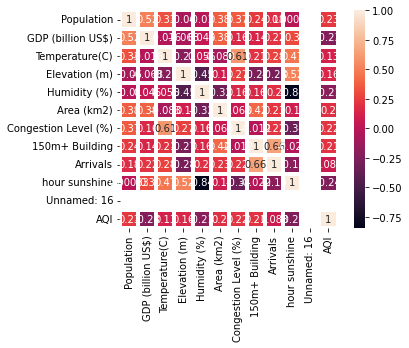

In [ ]:
sns.heatmap(final_table.corr(), square=True, annot=True, linewidths=3)

In [ ]:
from pandas.plotting import lag_plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd519799ad0>,
      dtype=object)

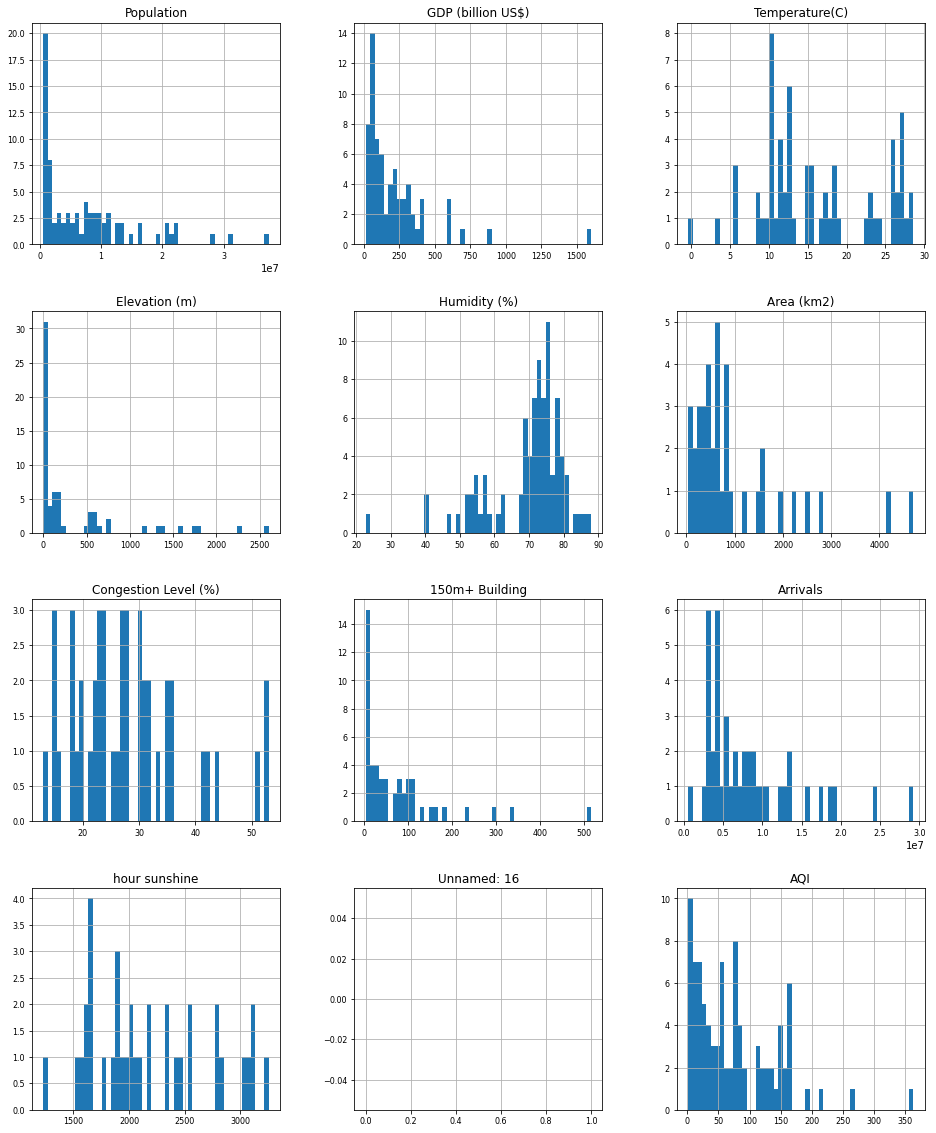

In [ ]:
final_table.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


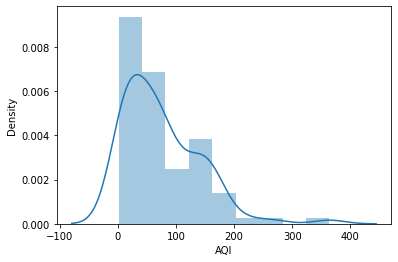

In [ ]:
sns.distplot(final_table['AQI'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


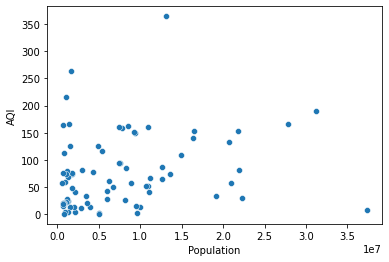

In [ ]:
sns.scatterplot(final_table["Population"], final_table["AQI"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


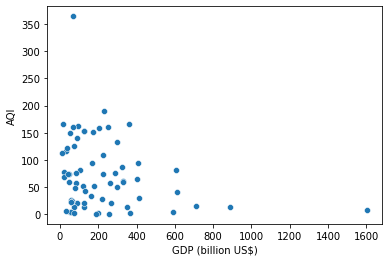

In [ ]:
sns.scatterplot(final_table["GDP (billion US$)"], final_table["AQI"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


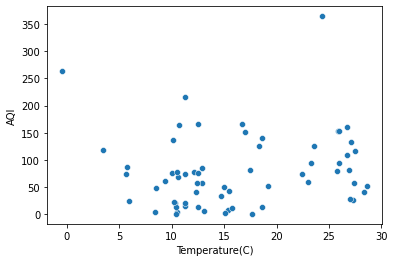

In [ ]:
sns.scatterplot(final_table["Temperature(C)"], final_table["AQI"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


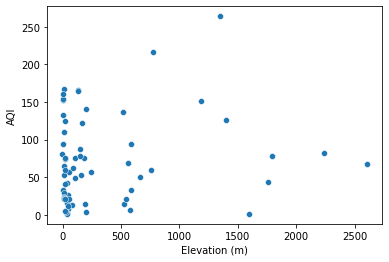

In [ ]:
sns.scatterplot(final_table["Elevation (m)"], final_table["AQI"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


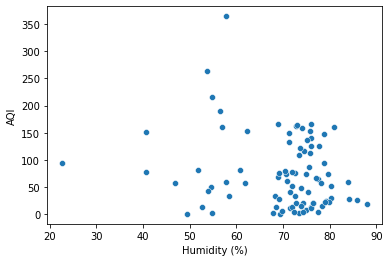

In [ ]:
sns.scatterplot(final_table["Humidity (%)"], final_table["AQI"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


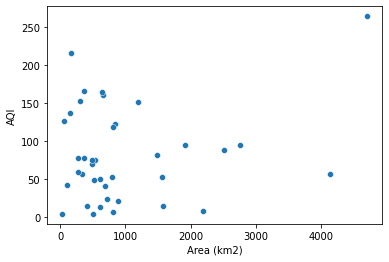

In [ ]:
sns.scatterplot(final_table['Area (km2)'], final_table["AQI"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


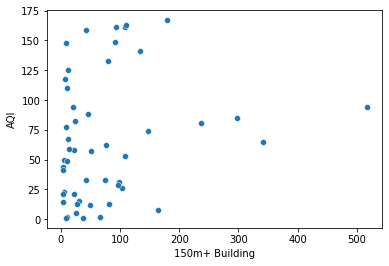

In [ ]:
sns.scatterplot(final_table['150m+ Building'], final_table["AQI"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


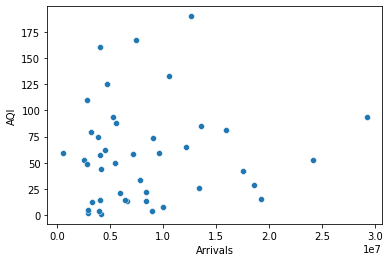

In [ ]:
sns.scatterplot(final_table['Arrivals'], final_table["AQI"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


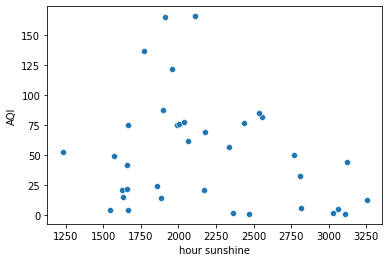

In [ ]:
sns.scatterplot(final_table['hour sunshine'], final_table["AQI"])

In [ ]:
greenAQI = final_table[final_table['AQI']<=50]
yellowAQI = final_table[final_table['AQI']<=100]
yellowAQI = yellowAQI[yellowAQI['AQI']>=51]
orangeAQI = final_table[final_table['AQI']<=150]
orangeAQI = orangeAQI[orangeAQI['AQI']>=101]
redAQI = final_table[final_table['AQI']<=200]
redAQI = redAQI[redAQI['AQI']>=151]
purpleAQI = final_table[final_table['AQI']<=300]
purpleAQI = purpleAQI[purpleAQI['AQI']>=201]
purpleAQI

,City,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
54,Ulaanbaatar,1615094.0,NaN,-0.4,1350.0,53.75,4704.4,NaN,NaN,NaN,NaN,NaN,264.0
64,Bishkek,1060113.0,NaN,11.3,771.0,54.75,169.9,NaN,NaN,NaN,NaN,NaN,216.0


In [ ]:
gpcorr=greenAQI.corr(method='pearson')
gpcorraqi=gpcorr.drop(pcorr.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1)
print(gpcorraqi)
gpcorr

                      Unnamed: 16       AQI
Population                    NaN  0.041448
GDP (billion US$)             NaN -0.104912
Temperature(C)                NaN  0.206796
Elevation (m)                 NaN  0.124098
Humidity (%)                  NaN  0.007681
Area (km2)                    NaN -0.253730
Congestion Level (%)          NaN  0.118365
150m+ Building                NaN -0.159473
Arrivals                      NaN  0.187424
hour sunshine                 NaN -0.140087
Unnamed: 16                   NaN       NaN
AQI                           NaN  1.000000


,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
Population,1.000000,0.767409,0.157413,-0.125305,0.082480,0.757619,0.593709,0.728966,0.306422,-0.040067,NaN,0.041448
GDP (billion US$),0.767409,1.000000,0.151104,-0.195982,-0.038220,0.762953,0.499006,0.529997,0.270929,0.222230,NaN,-0.104912
Temperature(C),0.157413,0.151104,1.000000,-0.098465,0.091956,0.156700,0.272232,0.315480,0.331269,0.697130,NaN,0.206796
Elevation (m),-0.125305,-0.195982,-0.098465,1.000000,-0.687322,-0.092179,-0.353901,-0.348519,-0.251029,0.595824,NaN,0.124098
Humidity (%),0.082480,-0.038220,0.091956,-0.687322,1.000000,0.131985,0.152932,0.411938,0.439127,-0.823411,NaN,0.007681
Area (km2),0.757619,0.762953,0.156700,-0.092179,0.131985,1.000000,0.280015,0.770003,0.317058,0.120865,NaN,-0.253730
Congestion Level (%),0.593709,0.499006,0.272232,-0.353901,0.152932,0.280015,1.000000,0.569565,0.069373,-0.252469,NaN,0.118365
150m+ Building,0.728966,0.529997,0.315480,-0.348519,0.411938,0.770003,0.569565,1.000000,0.440714,-0.074223,NaN,-0.159473
Arrivals,0.306422,0.270929,0.331269,-0.251029,0.439127,0.317058,0.069373,0.440714,1.000000,-0.407582,NaN,0.187424
hour sunshine,-0.040067,0.222230,0.697130,0.595824,-0.823411,0.120865,-0.252469,-0.074223,-0.407582,1.000000,NaN,-0.140087


In [ ]:
ypcorr=yellowAQI.corr(method='pearson')
ypcorraqi=ypcorr.drop(pcorr.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1)
print(ypcorraqi)
ypcorr

                      Unnamed: 16       AQI
Population                    NaN -0.075182
GDP (billion US$)             NaN  0.202142
Temperature(C)                NaN -0.077418
Elevation (m)                 NaN  0.127394
Humidity (%)                  NaN -0.286989
Area (km2)                    NaN  0.188193
Congestion Level (%)          NaN -0.455682
150m+ Building                NaN  0.354326
Arrivals                      NaN  0.252033
hour sunshine                 NaN  0.433662
Unnamed: 16                   NaN       NaN
AQI                           NaN  1.000000


,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
Population,1.000000,0.681119,0.168077,0.235804,-0.017867,0.707927,0.190568,-0.179487,0.082771,0.082832,NaN,-0.075182
GDP (billion US$),0.681119,1.000000,0.070936,0.167100,0.170545,0.467294,-0.215710,0.172499,0.393552,0.555499,NaN,0.202142
Temperature(C),0.168077,0.070936,1.000000,-0.076199,-0.103733,0.171463,0.733828,0.180416,0.406287,-0.001573,NaN,-0.077418
Elevation (m),0.235804,0.167100,-0.076199,1.000000,-0.245369,-0.150892,0.696095,-0.402737,-0.501721,0.603027,NaN,0.127394
Humidity (%),-0.017867,0.170545,-0.103733,-0.245369,1.000000,-0.253725,0.243762,0.208900,0.215060,-0.902663,NaN,-0.286989
Area (km2),0.707927,0.467294,0.171463,-0.150892,-0.253725,1.000000,-0.075362,0.277151,0.140628,0.046240,NaN,0.188193
Congestion Level (%),0.190568,-0.215710,0.733828,0.696095,0.243762,-0.075362,1.000000,-0.465144,0.443778,-0.606843,NaN,-0.455682
150m+ Building,-0.179487,0.172499,0.180416,-0.402737,0.208900,0.277151,-0.465144,1.000000,0.732213,0.295424,NaN,0.354326
Arrivals,0.082771,0.393552,0.406287,-0.501721,0.215060,0.140628,0.443778,0.732213,1.000000,0.816020,NaN,0.252033
hour sunshine,0.082832,0.555499,-0.001573,0.603027,-0.902663,0.046240,-0.606843,0.295424,0.816020,1.000000,NaN,0.433662


In [ ]:
chitable=final_table.copy()
chitable

,City,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
0,Tokyo,37339804.0,1602.000,15.4,43.0,74.83,2194.070,41.0,164.0,9985100.0,NaN,NaN,8.0
1,Delhi,31181376.0,229.000,NaN,NaN,56.50,NaN,NaN,NaN,12645300.0,NaN,NaN,190.0
2,Shanghai,27795702.0,360.000,16.7,15.0,75.92,NaN,22.0,180.0,7483500.0,NaN,NaN,167.0
3,Sao Paulo,22237472.0,411.000,NaN,NaN,80.17,NaN,30.0,99.0,NaN,NaN,NaN,31.0
4,Mexico City,21918936.0,608.000,17.5,2242.0,60.75,1485.000,NaN,24.0,NaN,2555.0,NaN,82.0
5,Dhaka,21741090.0,126.000,25.9,3.0,75.83,306.000,NaN,NaN,NaN,NaN,NaN,153.0
6,Beijing,20896820.0,259.000,12.9,51.0,46.83,4144.000,24.0,51.0,4002400.0,NaN,NaN,57.0
7,Mumbai,20667656.0,300.000,27.1,6.0,71.25,NaN,53.0,79.0,10590100.0,NaN,NaN,133.0
8,Osaka,19110616.0,NaN,NaN,1.0,72.58,NaN,35.0,43.0,7861500.0,NaN,NaN,33.0
9,Karachi,16459472.0,127.000,26.0,5.0,62.25,NaN,NaN,NaN,NaN,NaN,NaN,154.0


In [ ]:
min_mean_max=[]
for i in range(1,chitable.shape[1]-1):
  k=[]
  k.append(final_table[final_table.columns[i]].min())
  k.append(final_table[final_table.columns[i]].mean())
  k.append(final_table[final_table.columns[i]].max())
  min_mean_max.append(k)
min_mean_max

[[600708.0, 7579499.102564103, 37339804.0],
 [13.0, 218.19957352941174, 1602.0],
 [-0.4, 16.215625, 28.6],
 [-2.0, 348.6515151515151, 2605.0],
 [22.75, 69.72954022988505, 87.92],
 [32.61, 985.5768684210527, 4704.4],
 [13.0, 27.91304347826087, 53.0],
 [3.0, 75.48, 517.0],
 [500000.0, 8313725.5813953485, 29262700.0],
 [1230.0, 2187.813888888888, 3254.2],
 [nan, nan, nan]]

In [ ]:
chitable=final_table.copy()
cate=['low','medium','high']
for i in range(1,chitable.shape[1]):
  for j in range(0,chitable.shape[0]):
    test=float(chitable[chitable.columns[i]][j])
    if str(test) !="nan":
      if i==chitable.shape[1]-1:
        if (test<=50 and test>=0):
          chitable[chitable.columns[i]][j]="green"
        elif (test<=100 and test>=51):
          chitable[chitable.columns[i]][j]="yellow"
        elif (test<=150 and test>=101):
          chitable[chitable.columns[i]][j]="orange"
        elif (test<=200 and test>=151):
          chitable[chitable.columns[i]][j]="red"
        elif (test<=300 and test>=201):
          chitable[chitable.columns[i]][j]="purple"
      else:
        index=min_mean_max[i-1].index((min(min_mean_max[i-1], key=lambda x:abs(x-test))))
        chitable[chitable.columns[i]][j]=cate[index]
chitable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packag

,City,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
0,Tokyo,high,high,medium,low,medium,medium,high,medium,medium,NaN,NaN,green
1,Delhi,high,medium,NaN,NaN,medium,NaN,NaN,NaN,medium,NaN,NaN,red
2,Shanghai,high,medium,medium,low,medium,NaN,medium,medium,medium,NaN,NaN,red
3,Sao Paulo,medium,medium,NaN,NaN,high,NaN,medium,medium,NaN,NaN,NaN,green
4,Mexico City,medium,medium,medium,high,medium,medium,NaN,low,NaN,medium,NaN,yellow
5,Dhaka,medium,medium,high,low,medium,low,NaN,NaN,NaN,NaN,NaN,red
6,Beijing,medium,medium,medium,low,medium,high,medium,medium,low,NaN,NaN,yellow
7,Mumbai,medium,medium,high,low,medium,NaN,high,medium,medium,NaN,NaN,orange
8,Osaka,medium,NaN,NaN,low,medium,NaN,medium,medium,medium,NaN,NaN,green
9,Karachi,medium,medium,high,low,medium,NaN,NaN,NaN,NaN,NaN,NaN,red


In [ ]:
'''chitable=final_table.copy()
for i in range(1,chitable.shape[1]):
  for j in range(0,chitable.shape[0]):
    test=float(chitable[chitable.columns[i]][j])
    if str(test) !="nan":
      if i==11: #aqi
        if (test<=50 and test>=0):
          chitable[chitable.columns[i]][j]="green"
        elif (test<=100 and test>=51):
          chitable[chitable.columns[i]][j]="yellow"
        elif (test<=150 and test>=101):
          chitable[chitable.columns[i]][j]="orange"
        elif (test<=200 and test>=151):
          chitable[chitable.columns[i]][j]="red"
        elif (test<=300 and test>=201):
          chitable[chitable.columns[i]][j]="purple"
      if i==10: #hour sunshine
        if (test<=2400):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=3000 and test>2400):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>3000):
          chitable[chitable.columns[i]][j]="high"
      if i==9: #arrival
        if (test<=2000000):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=10000000 and test>2000000):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>10000000):
          chitable[chitable.columns[i]][j]="high"
      if i==8: #building
        if (test<=100):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=1000 and test>100):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>1000):
          chitable[chitable.columns[i]][j]="high"
      if i==7: #traffic
        if (test<=100):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=200 and test>100):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>200):
          chitable[chitable.columns[i]][j]="high"
      if i==6: #area
        if (test<=1000):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=5000 and test>1000):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>5000):
          chitable[chitable.columns[i]][j]="high"
      if i==5: #humid
        if (test<=50):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=70 and test>50):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>70):
          chitable[chitable.columns[i]][j]="high"
      if i==4: #high
        if (test<=200):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=1000 and test>200):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>1000):
          chitable[chitable.columns[i]][j]="high"
      if i==3: #temperature
        if (test<=10):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=20 and test>10):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>20):
          chitable[chitable.columns[i]][j]="high"
      if i==2: #gdp
        if (test<=100):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=600 and test>100):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>600):
          chitable[chitable.columns[i]][j]="high"
      if i==1: #population
        if (test<=5000000):
          chitable[chitable.columns[i]][j]="low"
        elif (test<=30000000 and test>5000000):
          chitable[chitable.columns[i]][j]="medium"
        elif (test>30000000):
          chitable[chitable.columns[i]][j]="high"
chitable'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18:

,City,Population,GDP (billion US$),Temperature(C),Elevation (m),Humidity (%),Area (km2),Congestion Level (%),150m+ Building,Arrivals,hour sunshine,Unnamed: 16,AQI
0,Tokyo,37339804.0,1602.000,15.4,43.0,74.83,2194.070,41.0,164.0,9985100.0,NaN,NaN,green
1,Delhi,31181376.0,229.000,NaN,NaN,56.50,NaN,NaN,NaN,12645300.0,NaN,NaN,red
2,Shanghai,27795702.0,360.000,16.7,15.0,75.92,NaN,22.0,180.0,7483500.0,NaN,NaN,red
3,Sao Paulo,22237472.0,411.000,NaN,NaN,80.17,NaN,30.0,99.0,NaN,NaN,NaN,green
4,Mexico City,21918936.0,608.000,17.5,2242.0,60.75,1485.000,NaN,24.0,NaN,high,NaN,yellow
5,Dhaka,21741090.0,126.000,25.9,3.0,75.83,306.000,NaN,NaN,NaN,NaN,NaN,red
6,Beijing,20896820.0,259.000,12.9,51.0,46.83,4144.000,24.0,51.0,4002400.0,NaN,NaN,yellow
7,Mumbai,20667656.0,300.000,27.1,6.0,71.25,NaN,53.0,79.0,10590100.0,NaN,NaN,orange
8,Osaka,19110616.0,NaN,NaN,1.0,72.58,NaN,35.0,43.0,7861500.0,NaN,NaN,green
9,Karachi,16459472.0,127.000,26.0,5.0,62.25,NaN,NaN,NaN,NaN,NaN,NaN,red


In [ ]:
sunaqi= pd.crosstab(chitable['AQI'], chitable['hour sunshine'])
sunaqi

hour sunshine,high,low,normal
AQI,,,
green,9,7,4
orange,0,1,1
red,0,0,2
yellow,3,2,7


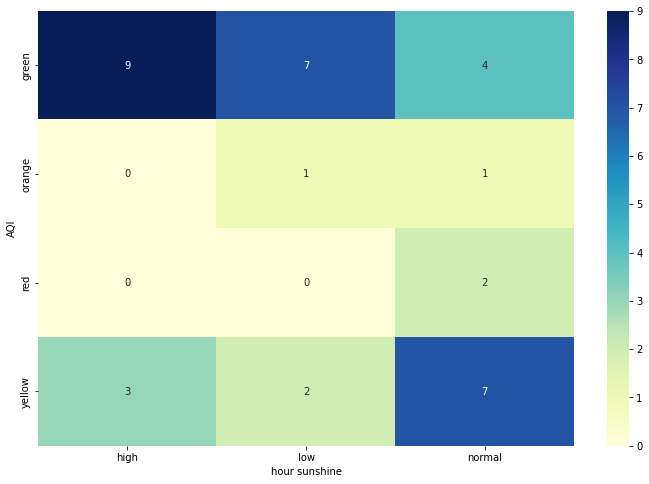

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(sunaqi, annot=True, cmap="YlGnBu")

In [ ]:
!pip install scipy

In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(sunaqi)
print(c)
print(p)
print(dof)
print(expected)

9.205714285714285
0.1623350949672217
6
[[6.66666667 5.55555556 7.77777778]
 [0.66666667 0.55555556 0.77777778]
 [0.66666667 0.55555556 0.77777778]
 [4.         3.33333333 4.66666667]]
